<a href="https://colab.research.google.com/github/mattjone5/IS_4487/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import what we need

In [2]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns

Set up the variables to let us get our data

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv', encoding="latin1")

df

Mounted at /content/gdrive


,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,$5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,$171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,$19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,$15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,$27.93,2019-06,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,637,Jayson Andriessen,0819 Crownhardt Circle,Allentown,Pennsylvania,NaN,8143,2021-06-13,637,8143,113,16.0,113,Extension cord,$15.59,$249.44,2021-06,June
9565,370,Darby Tesseyman,7468 Jackson Circle,Albany,NY,12210.0,8144,2021-06-16,370,8144,109,1.0,109,Samsung Galaxy Note 10,$749.99,$749.99,2021-06,June
9566,598,Henka De Ferrari,89 Sunnyside Drive,Redwood City,California,94064.0,8145,2021-05-09,598,8145,110,1.0,110,Apple iPad Mini,$329.99,$329.99,2021-05,May
9567,737,Tommie Penvarne,9630 Washington Hill,Watertown,Massachusetts,2472.0,8146,2021-04-13,737,8146,113,2.0,113,Extension cord,$15.59,$31.18,2021-04,April


In [4]:
dfBad = df[df.isnull().any(axis=1)]
dfBad

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
5730,435,Kennith Cake,30917 Starling Hill,Orlando,Florida,32825.0,6052,NaN,435,6052,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,NaN,NaN
5741,297,Lucita O'Callaghan,6 South Drive,San Francisco,CA,94142.0,6063,NaN,297,6063,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,NaN,NaN
5748,704,Val Ellsbury,75253 Bultman Crossing,NaN,Colorado,80127.0,6071,2019-06-29,704,6071,106,18.0,106,Great value Juice,$1.99,$35.82,2019-06,June
5749,793,Britni Heinemann,629 Old Shore Drive,Baton Rouge,Louisiana,NaN,6072,2020-05-29,793,6072,101,1.0,101,Dell E5470 Laptop,$485.00,$485.00,2020-05,May
5755,437,Sumner Plastow,05 Bunting Hill,Norwalk,Connecticut,6854.0,6080,NaN,437,6080,106,7.0,106,Great value Juice,$1.99,$13.93,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,724,Karlotte Beste,5819 Sage Terrace,NaN,Florida,33462.0,8128,2021-05-14,724,8128,111,3.0,111,Printer Ink Cartridge,$39.99,$119.97,2021-05,May
9558,656,Emmerich Privost,NaN,Washington,District of Columbia,56944.0,8137,2021-01-17,656,8137,111,8.0,111,Printer Ink Cartridge,$39.99,$319.92,2021-01,January
9562,782,Edmund Hugues,814 Scott Terrace,Kansas City,Missouri,64136.0,8141,2021-01-20,782,8141,110,NaN,110,Apple iPad Mini,$329.99,NaN,2021-01,January
9563,722,Marwin Darrigoe,22 South Crossing,Houston,Texas,NaN,8142,2021-08-26,722,8142,109,1.0,109,Samsung Galaxy Note 10,$749.99,$749.99,2021-08,August


For fixing data, if you have to postal code, you can get the State and City. You can update the total price by getting the price of all of the items added up.

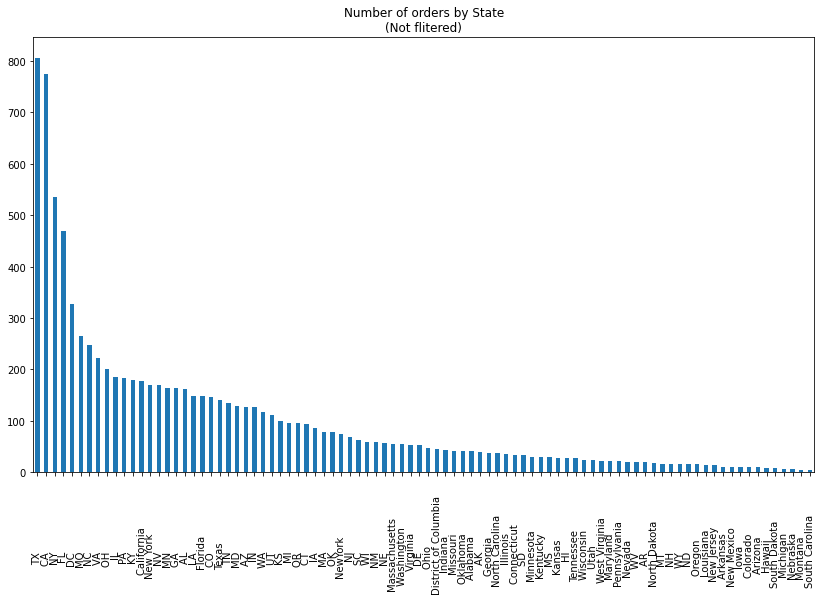

In [8]:
dfGood = df.dropna()
#ax = dfGood.plot.bar(x='state_province')
ax = dfGood['state_province'].value_counts().plot(kind='bar', figsize=(14,8), title="Number of orders by State\n(Not flitered)")